In [55]:
# libraries and frameworks
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [56]:
# csv -> DataFrame
houseprice_df = pd.read_csv("houseprice_train.csv")

In [57]:
houseprice_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [58]:
houseprice_df.corr()

<ipython-input-58-725cf5cfc93f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  houseprice_df.corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [59]:
houseprice_df.corr().iloc[-1,:].sort_values()

<ipython-input-59-a88c609cb354>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  houseprice_df.corr().iloc[-1,:].sort_values()


KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

In [60]:
# features
print(houseprice_df[['GrLivArea']]) # +ve corr
print(houseprice_df[['YrSold']]) # -ve corr

      GrLivArea
0          1710
1          1262
2          1786
3          1717
4          2198
...         ...
1455       1647
1456       2073
1457       2340
1458       1078
1459       1256

[1460 rows x 1 columns]
      YrSold
0       2008
1       2007
2       2008
3       2006
4       2008
...      ...
1455    2007
1456    2010
1457    2010
1458    2010
1459    2008

[1460 rows x 1 columns]


 Intercept: 18569.0
 Slope: 107.1


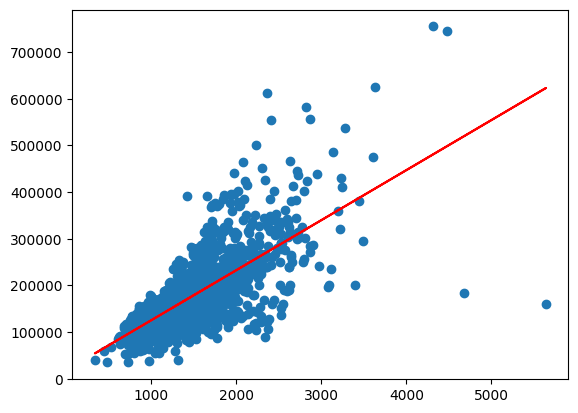

In [61]:
##
# Simple Linear Model
##
X = houseprice_df[['GrLivArea']] # +ve corr
y = houseprice_df[['SalePrice']]
simple_model_saleVSlivarea = LinearRegression().fit(X,y)

# intercept, slope
print(f" Intercept: {simple_model_saleVSlivarea.intercept_[0]:.1f}\n",
      f"Slope: {simple_model_saleVSlivarea.coef_[0][0]:.1f}")

# visualization
y_predicted = simple_model_saleVSlivarea.predict(X)
plt.plot(X,y_predicted , c = 'red')
plt.scatter(X, y)
plt.show()

**Concept Part**
1. The correlation between "SalePrice" and "GrLivArea" shows a positive correlation of 0.71. The correlation strength is fairly high.
2. The slope of linear regression model between Living Area in X-axis and House Price in y-axis with a value of 107.1 can be interpreted as "the predicted cost of house price increases by $107.1 for every sq. foot of increase in the living area."
3. If I could add another feature to this already exsiting model or I would start with two features to work with, the "YrSold" or year the house was sold feature, which has a negative correlation with predicted house price. I think this would both of them combined, since they have opposite correlation strengths fitted with SalePrice, would help us see the complete picture.
4. Based on the data and based on the features we have selected, although I don't have much domain knowlege in this field as a student, I would recommend buying the house that has higher living space, since living space has high correlation with the predicted prices of the house. This could mean that the house could hold it's resell value or might be evaluated for higher sale in the future.
Since we have studied the correlation, houses that are old and having lower quality finish to avoid.

SalePrice    56053.503559
dtype: float64


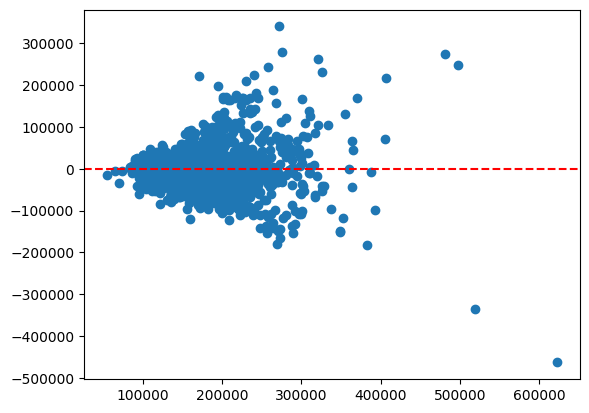

In [64]:
##
# Bonus Coding Part
##
error = y - y_predicted
plt.axhline(y = 0, c = 'red', ls = "--")
plt.scatter(y_predicted, error)

# standard deviation
print(error.std())

SalePrice    56053.503559
dtype: float64